In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
folders = os.listdir('/content/drive/MyDrive/datasets/')
print(folders)

['humans', 'horses', 'dogs', 'cats']


In [ ]:
for f in folders:
  path = '/content/drive/MyDrive/datasets/' + f

  print(f+" " + str(len(os.listdir(path))))

humans 181
horses 181
dogs 181
cats 181


In [ ]:
import keras.utils as image
import matplotlib.pyplot as plt

In [ ]:
sample_image = '/content/drive/MyDrive/datasets/dogs/dog.100.jpg'
img = image.load_img(sample_image)
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [ ]:
img = image.img_to_array(img)/255.0
print(img.shape)

(397, 500, 3)


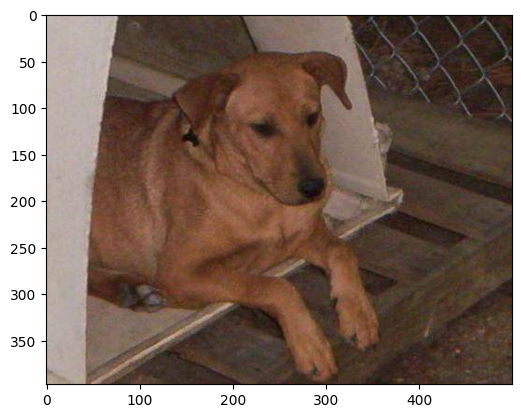

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_gen.flow_from_directory('/content/drive/MyDrive/datasets/',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 724 images belonging to 4 classes.


In [ ]:
for x, y in train_generator:
  x, y = train_generator.next()
  print(x.shape, y.shape)
  break

(32, 224, 224, 3) (32, 4)


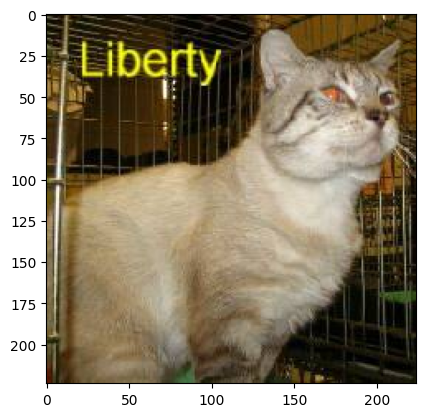

[1. 0. 0. 0.]


In [ ]:
plt.imshow(x[1])
plt.show()
print(y[10])

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import numpy as np

In [ ]:
base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape=(224, 224, 3))
base_model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [ ]:
for layer in base_model.layers:
  layer.trainable = True

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(4, activation = 'softmax')(x)

In [ ]:
model = Model(inputs = base_model.input, outputs = x)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics=["accuracy"])

In [ ]:
history = model.fit_generator(
    train_generator,
    epochs = 100,
    steps_per_epoch = 7
  )

<ipython-input-19-f51ab8362f49>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
7/7 [==============================] - 95s 6s/step - loss: 0.8207 - accuracy: 0.7500
Epoch 2/100
7/7 [==============================] - 35s 5s/step - loss: 0.8659 - accuracy: 0.7679
Epoch 3/100
7/7 [==============================] - 20s 3s/step - loss: 0.8189 - accuracy: 0.8393
Epoch 4/100
7/7 [==============================] - 14s 2s/step - loss: 0.5315 - accuracy: 0.7925
Epoch 5/100
7/7 [==============================] - 9s 1s/step - loss: 0.4710 - accuracy: 0.8393
Epoch 6/100
7/7 [==============================] - 7s 950ms/step - loss: 0.4386 - accuracy: 0.8482
Epoch 7/100
7/7 [==============================] - 4s 509ms/step - loss: 0.3190 - accuracy: 0.8973
Epoch 8/100
7/7 [==============================] - 3s 380ms/step - loss: 0.2162 - accuracy: 0.9292
Epoch 9/100
7/7 [==============================] - 3s 393ms/step - loss: 0.2799 - accuracy: 0.9107
Epoch 10/100
7/7 [==============================] - 2s 318ms/step - loss: 0.2112 - accuracy: 0.9340
Epoch 11/100
7/7 [==

In [ ]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name)

0 input_1
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [67]:
# model.evaluate("/content/drive/MyDrive/test/dogs/dog.126.jpg")


In [ ]:
folders1 = os.listdir('/content/drive/MyDrive/test/')
print(folders1)

['horses', 'dogs', 'humans', 'cats']


In [ ]:
for f in folders1:
  path = '/content/drive/MyDrive/test/' + f

  print(f+" " + str(len(os.listdir(path))))

horses 21
dogs 21
humans 21
cats 21


In [ ]:
sample_image1 = '/content/drive/MyDrive/test/dogs/dog.126.jpg'
img1 = image.load_img(sample_image)
print(type(img1))


<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [61]:
img1 = image.img_to_array(img)
print(img1.shape)




(397, 500, 3)


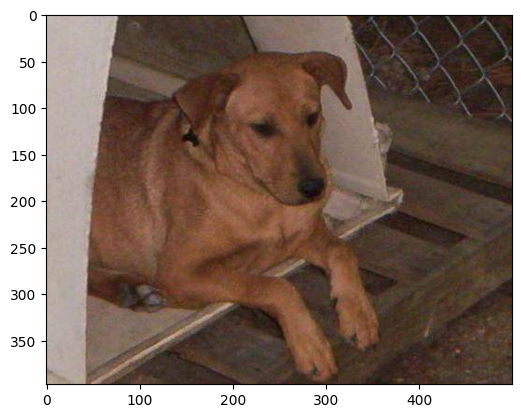

In [62]:
plt.imshow(img1)
plt.show()

In [64]:
train_gen1 = ImageDataGenerator

train_generator1 = train_gen.flow_from_directory('/content/drive/MyDrive/test/',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 84 images belonging to 4 classes.


In [65]:
model.evaluate(train_generator1)

3/3 [==============================] - 1s 101ms/step - loss: 2.4800 - accuracy: 0.3333


[2.4799764156341553, 0.3333333432674408]

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(397, 500, 3)


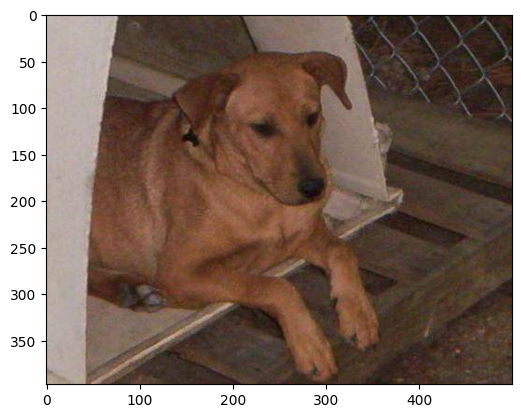

In [60]:
sample_image = '/content/drive/MyDrive/datasets/dogs/dog.100.jpg'
img = image.load_img(sample_image)
print(type(img))
img = image.img_to_array(img)/255.0
print(img.shape)
plt.imshow(img)
plt.show()